# Introduction

We are given a dataset from the titanic listing passengers that survived or did not survive in the catastrophe. We are given information on the following things:

survival: Survival, 0=No, 1=Yes  
pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd   
name: Name
sex: Sex  
Age: Age in years  
sibsp: number of siblings/spouses aboard the Titanic  
parch: number of parents/children aboard the Titanic  
ticket: Ticket number  
fare: Passenger fare  
cabin: Cabin number  
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

For more information see [Kaggle](https://www.kaggle.com/c/titanic/data). 

# Importing the Necessary Libraries
We import the following libraries

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# A first Look at the Data

## Loading the Data

In [249]:
data=pd.read_csv("titanic_data.csv")

## Getting an Overview

In [250]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Values
We can see that there is data for 891 passengers and that there are NaNs in the Cabin column. It seems that there are also NaN in the Age column as the count is only 714. Lets check this:

In [252]:
np.isnan(data['Age']).sum()

177

There are 177 NaNs in the Age column.
Let's look further: As there is the full number of datasets in the columns PassengerID, Survived, Pclass, Age, SibSp, Parch and Fare we assume there are no NaNs there.   
Lets check the other columns for null values:

In [253]:
pd.isnull(data['Name']).sum()


0

In [254]:
pd.isnull(data['Sex']).sum()

0

In [255]:
pd.isnull(data['Ticket']).sum()

0

In [256]:
pd.isnull(data['Cabin']).sum()

687

In [257]:
pd.isnull(data['Embarked']).sum()

2

We conclude that there are missing values in the columns:  
Age  
Cabin  
Embarked

We keep the rows containing missing values anyway, as for the further analysis not all columns of the data are relevant.

## Number of Survivors

Next we want to find out how many people out of our dataset survived or did not survive.

In [258]:
data['Survived'].sum()

342

We can see that 342 out of the 891 passengers in our dataset survived the catastrophe.

# Asking questions and exploring the data
We are interested in finding out what made a passenger more likely to survive. A first idea would be to look at the relationship between the survival rate and the fare. But we will see in the next section that we cannot infer how much a certain person paid for his own ticket because some passengers travelled in groups.  
So we will instead look at the following relationships:
* Pclass and survivalrate
* Sex and survivalrate
* Age and survivalrate

## Tickets and Fares

When taking a look at the number of unique tickets

In [259]:
len(data["Ticket"].unique())

681

we can see that there can be more than one passenger travelling on one ticket. Let's take a closer look at the groups which are longer than 1:

In [260]:
def look_at(dat):
    #if dat["PassengerID"]<20:
    if len(dat)>1:
        return(dat)

grouped_ticket=data.groupby('Ticket')
result=grouped_ticket["Name","SibSp","Parch"].apply(look_at)
print(result.head(30))


                                                         Name  SibSp  Parch
Ticket                                                                     
110152 257                               Cherry, Miss. Gladys      0      0
       504                              Maioni, Miss. Roberta      0      0
       759  Rothes, the Countess. of (Lucy Noel Martha Dye...      0      0
110413 262                                  Taussig, Mr. Emil      1      1
       558             Taussig, Mrs. Emil (Tillie Mandelbaum)      1      1
       585                                Taussig, Miss. Ruth      0      2
110465 110                     Porter, Mr. Walter Chamberlain      0      0
       475                        Clifford, Mr. George Quincy      0      0
111361 329                       Hippach, Miss. Jean Gertrude      0      1
       523    Hippach, Mrs. Louis Albert (Ida Sophia Fischer)      0      1
113505 166             Chibnall, Mrs. (Edith Martha Bowerman)      0      1
       356  

We can see that some families seem to be traveling on the same ticket, but we also see groups where we do not know the relationship between the members.

Let's take a look at the Fare column for the ticket groups:

In [261]:
result2=grouped_ticket["Fare"].apply(look_at)
print(result2.head(30))

Ticket     
110152  257     86.5000
        504     86.5000
        759     86.5000
110413  262     79.6500
        558     79.6500
        585     79.6500
110465  110     52.0000
        475     52.0000
111361  329     57.9792
        523     57.9792
113505  166     55.0000
        356     55.0000
113572  61      80.0000
        829     80.0000
113760  390    120.0000
        435    120.0000
        763    120.0000
        802    120.0000
113776  151     66.6000
        336     66.6000
113781  297    151.5500
        305    151.5500
        498    151.5500
        708    151.5500
113789  35      52.0000
        383     52.0000
113798  270     31.0000
        842     31.0000
113803  3       53.1000
        137     53.1000
Name: Fare, dtype: float64


From what we can see a certain fare corresponds to a certain ticket. Therefore we are not able to say how much a certain person paid, just how much a certain group travelling on the same ticket paid.

## Relationship between Pclass and Survival Rate

In [262]:
def makep(str):
    grouped=data.groupby(str)
    m=grouped['Survived'].mean()
    m.plot.bar()
    plt.ylabel('Survival Rate')

Lets have a look at the Survival Rate for a given Pclass:

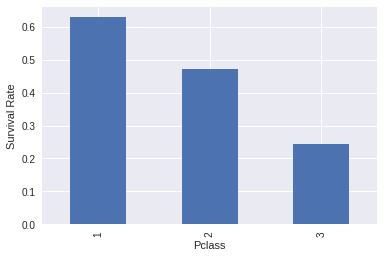

In [263]:
makep('Pclass')

As we might have expected the survival rate is higher the lower the Pclass is.

## Relationship between Sex and Survival Rate

We can have a similiar plot for the relationship between sex and survival rate:

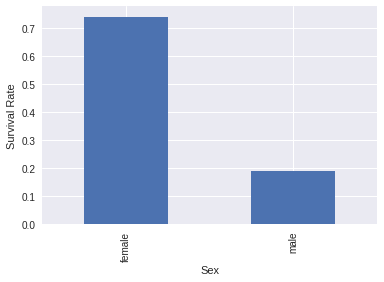

In [264]:
makep('Sex')

Obviously you had a much higher chance to survive if you were female.

We can also plot the survival rate for pclass and sex in one plot:

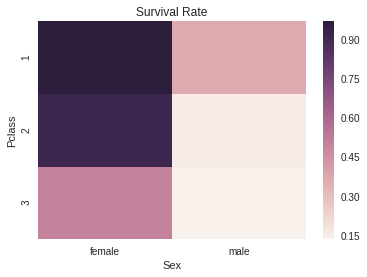

In [265]:
group_pclass_sex=data.groupby(["Pclass","Sex"])
mps=group_pclass_sex["Survived"].mean()
vec1=mps.index.get_level_values('Pclass')
vec2=mps.index.get_level_values('Sex')
df=pd.DataFrame({'Pclass':vec1,'Sex':vec2,"Survival Rate":mps.values})
pic=df.pivot('Pclass','Sex','Survival Rate')
sns.heatmap(pic)
plt.title('Survival Rate')

## Relationship between Age and Survival Rate

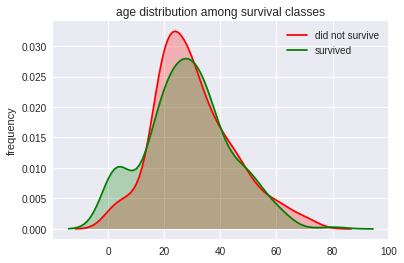

In [266]:
dn=data[(data['Survived']==0) & (~data['Age'].isnull())]
x=dn['Age']
ax=sns.kdeplot(x, shade=True, color="r")
ds=data[(data['Survived']==1) & (~data['Age'].isnull())]
y=ds['Age']
sns.kdeplot(y,shade=True,color="g",ax=ax)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived'])

The age distributions for the class of people that did not survive and the class of people that did survive look pretty similiar. Let's have a look at the survival rate for the age quantiles:

           Interval  Survival Rate
0-0.2    [0.42, 19]       0.481707
0.2-0.4    (19, 25]       0.328467
0.4-0.6  (25, 31.8]       0.393701
0.6-0.8  (31.8, 41]       0.437500
0.8-1      (41, 80]       0.373239


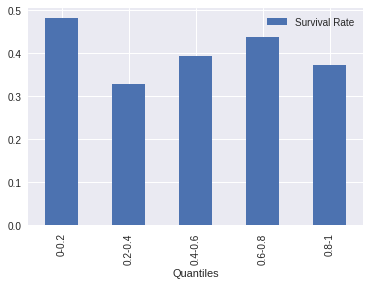

In [267]:
data_2=data[['Age','Survived']]
data_2a=data_2.dropna()
temp=pd.DataFrame(pd.qcut(data_2a['Age'],[0,0.2,0.4,0.6,0.8,1]))
temp.columns=['Interval']
data_2b=pd.merge(data_2a,temp,left_index=True,right_index=True)
data_2b_rate=data_2b.groupby('Interval')['Survived'].mean()
#data2d=pd.DataFrame({'Percentile':['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1'],'Survival Rate':data_2b_rate.values})
data2c=pd.DataFrame({'Survival Rate':data_2b_rate.values},index=['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1'])
data2c.plot.bar()
plt.xlabel('Quantiles')
data2d=pd.DataFrame({'Interval':data_2b_rate.index,'Survival Rate':data_2b_rate.values},index=['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1'])
print(data2d)




Looking at the survival rates for these quantiles we cannot say that lower or higher age increased or decreased your chance of survival, it rather seems that your chance of survival was lowest when your age was in between 19 and 25.

# Conclusion

We first want to mention that this analysis is by far not complete and can do no more than give a first idea.

One issue is that we do not have data on all the passengers and crew as according to wikipedia there were 2,224 passengers and crew aboard and we only have data on 891 people. Furthermore our data contains missing values. There might also be further features relevant to the analysis, e.g. social status. It might also be interesting to look at on which deck a passengers cabin was.

Also did we not use statistical methods to proof correlation but instead only had an explorative look at the data. One could calculate the R-score or use a regression model (or even neural nets) to proof corellation.

Yet we do think that a lower pclass and being female is related to having had a higher chance of survival. We cannot say that lower or higher age increased or decreased your chance of survival, it rather seems that your chance of survival was lowest when your age was in between 19 and 25.

# Further Research

First of all one should get data on the other passengers and crew. Missing values should be explained and features like social status added. Furthermore the combination of the cabin number and a map of the ship should help determine relationships there.  

Statistical methods like calculation R-scores, regression or other machine learning methods should be used to proof corellation. Next thing correlation is not causation. So one should also have a look at that.